# Twitter Sentiment Prediction 
In this notebook, we use our complete dataset with the column of Sentiment to do a simple Twitter Sentiment Analysis supervised learning model using python and NLP (Natural Language Processing) libraries.

## Setting up

In [18]:
import pandas as pd
import numpy as np
import re
import string
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score  
from sklearn.metrics import plot_confusion_matrix
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
#Plots
import seaborn as sns
from matplotlib import pyplot as plt
# Global Parameters
stop_words = set(stopwords.words('english'))

In [4]:
def preprocess_tweet_text(tweet):
    if(isinstance(tweet, str)):
        # Remove urls
        tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
        # Remove user @ references and '#' from tweet
        tweet = re.sub(r'\@\w+|\#','', tweet)
        # Remove punctuations
        tweet = tweet.translate(str.maketrans('', '', string.punctuation))
        # Remove stopwords
        tweet_tokens = word_tokenize(tweet)
        filtered_words = [w for w in tweet_tokens if not w in stop_words]

        ps = PorterStemmer()
        stemmed_words = [ps.stem(w) for w in filtered_words]
        #lemmatizer = WordNetLemmatizer()
        #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]

        return " ".join(filtered_words)
    else:
        return tweet

In [5]:
def load_dataset(filename, cols):
    dataset = pd.read_csv(filename, encoding='latin-1')
    dataset.columns = cols
    return dataset

**Note**: Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.

In [6]:
def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [7]:
#The sentiment column is comprised of the integer values 0, 2, and 4. 
def int_to_string(sentiment):
    if sentiment == -1:
        return "Negative"
    elif sentiment == 0:
        return "Neutral"
    else:
        return "Positive"

In [8]:
def redefine_dataset(dataset):
    new_dataset = pd.DataFrame()
    new_dataset['text'] = dataset['Tweets']
    new_dataset['target'] = dataset['SA']
    #new_dataset['target'] = np.array([ int_to_string(tweet) for tweet in dataset['SA'] ])
    return new_dataset

You'll see Naive Bayes and Logistic Regression algorithms for predictions. These two algorithms are quite popular in NLP, although you can try out other options too.

In [97]:
keywords = ['Tweets', 'len', 'ID', 'Date', 'Source', 'Likes', 'RTs',
       'User Location', 'Geo', 'Coordinates', 'SA TextBlob', 'SA']
# Load dataset
dataset = load_dataset("sample_data/final_tweets_dataset.csv", keywords)
# Remove unwanted columns from dataset
df = redefine_dataset(dataset)
#Preprocess data
df['text'] = df['text'].apply(preprocess_tweet_text)

In [98]:
df.head()

,text,target
0,RT One thing threat Coronavirus outbreak made ...,1
1,RT Mon beaufrÃ¨re prÃ©sente tous les symptÃ´me...,0
2,RT SoireeBFMTV Nous avons un objectif freiner ...,1
3,RT Coronavirus CoronavirusPy Esta es la primer...,1
4,RT Ya os lo digo yo Â¡PARA JODER,-1


In [99]:
tf_vector = get_feature_vector(np.array(df.iloc[:, 0]))
X = tf_vector.transform(np.array(df.iloc[:, 0]).ravel())
y = np.array(df.iloc[:, 1]).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

**Note**: foram utilizados um split de 80-20 de treino/teste.

***
# Classification

We use classification methods for training the model based on the already labeled sentiments and try to predict the sentiments of the tweet according to the model choosed.

## K Nearest Neighbours

In [100]:
# Training KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)
print(accuracy_score(y_test, y_predict_knn))

0.5007938151446124


### Confusion Matrix

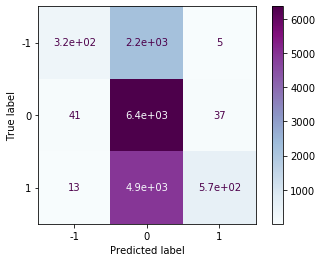

In [74]:
confusion_matrix(y_test, y_predict_knn)
plot_confusion_matrix(knn, X_test, y_test, cmap='BuPu')  

In [65]:
print(classification_report(y_test, y_predict_knn, labels=np.unique(y_predict_knn)))

              precision    recall  f1-score   support

          -1       0.86      0.13      0.22      2533
           0       0.47      0.99      0.64      6447
           1       0.93      0.10      0.19      5507

    accuracy                           0.50     14487
   macro avg       0.75      0.41      0.35     14487
weighted avg       0.71      0.50      0.39     14487



## Naive Bayes model

In [102]:
# Training Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_predict_nb = NB_model.predict(X_test)
print(accuracy_score(y_test, y_predict_nb))

0.667149858493822


### Confusion Matrix

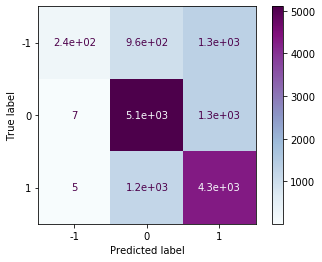

In [73]:
confusion_matrix(y_test, y_predict_nb)
plot_confusion_matrix(NB_model, X_test, y_test, cmap='BuPu')  

In [69]:
print(classification_report(y_test, y_predict_nb, labels=np.unique(y_predict_nb)))

              precision    recall  f1-score   support

          -1       0.95      0.10      0.17      2533
           0       0.70      0.79      0.75      6447
           1       0.62      0.78      0.69      5507

    accuracy                           0.67     14487
   macro avg       0.76      0.56      0.54     14487
weighted avg       0.71      0.67      0.62     14487



## Logistics Regression model

In [120]:
# Training Logistics Regression model
LR_model = LogisticRegression(max_iter=500)
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))

0.778560088355077


### Confusion matrix

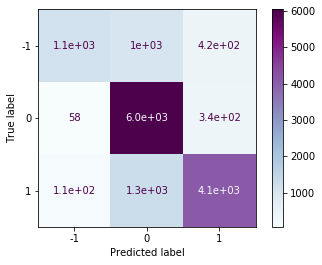

In [123]:
from matplotlib import pyplot as plt
confusion_matrix(y_test, y_predict_lr)
plot_confusion_matrix(LR_model, X_test, y_test, cmap='BuPu')  
plt.savefig('plots/confusionLR.png')

In [122]:
print(classification_report(y_test, y_predict_lr, labels=np.unique(y_predict_lr)))

              precision    recall  f1-score   support

          -1       0.87      0.44      0.59      2533
           0       0.73      0.94      0.82      6447
           1       0.84      0.75      0.79      5507

    accuracy                           0.78     14487
   macro avg       0.81      0.71      0.73     14487
weighted avg       0.80      0.78      0.77     14487



***
# Regression

For we regression, we need to import the dataset with the polarity data.

In [9]:
keywords = ['Tweets', 'len', 'ID', 'Date', 'Source', 'Likes', 'RTs',
       'User Location', 'Geo', 'Coordinates', 'SA']
# Load dataset
dataset = load_dataset("sample_data/polarity_dataset.csv", keywords)
# Remove unwanted columns from dataset
df = redefine_dataset(dataset)
#Preprocess data
df['text'] = df['text'].apply(preprocess_tweet_text)

In [10]:
df.head()

,text,target
0,RT One thing threat Coronavirus outbreak made ...,0.05
1,RT Mon beaufrÃ¨re prÃ©sente tous les symptÃ´me...,0.00
2,RT SoireeBFMTV Nous avons un objectif freiner ...,0.30
3,RT Coronavirus CoronavirusPy Esta es la primer...,0.25
4,RT Ya os lo digo yo Â¡PARA JODER,-0.50


In [11]:
tf_vector_regression = get_feature_vector(np.array(df.iloc[:, 0]))
X = tf_vector_regression.transform(np.array(df.iloc[:, 0]).ravel())
y = np.round(np.array(df.iloc[:, 1]).ravel(), decimals=1)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=30)

## Linear Regression model

In [161]:
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train_reg, y_train_reg)
y_predict_lin = lin_regr.predict(X_test_reg)
print(f'Mean squared error: {mean_squared_error(y_test_reg, y_predict_lin):.2f}' )
print(f'R2: {r2_score(y_test_reg, y_predict_lin):.2f}')

Mean squared error: 0.34
R2: -4.93


Noticed that the r2 is negative, this means that we are doing worse than the mean value. This is problably because our model cannot be fitted in a linear function.

## Ridge Regression model

In [12]:
Rid_model = Ridge(alpha=0.6)
Rid_model.fit(X_train_reg, y_train_reg)
y_predict_rid = Rid_model.predict(X_test_reg)

We can evaluate the Ridge Regression model on the housing dataset using repeated 10-fold cross-validation and report the average mean absolute error (MAE) on the dataset.

In [13]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(Rid_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print(f'Mean squared error: {mean_squared_error(y_test_reg, y_predict_rid):.2f}' )
print(f'R2: {r2_score(y_test_reg, y_predict_rid):.2f}')

Mean MAE: 0.127 (0.004)
Mean squared error: 0.04
R2: 0.34


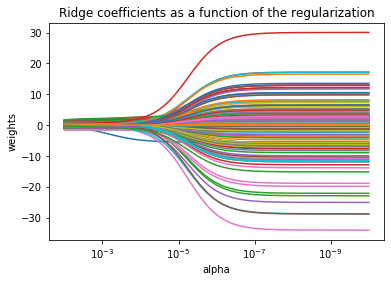

In [20]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train_reg, y_train_reg)
    coefs.append(ridge.coef_)
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.savefig('plots/ridgeCoefficients.png')
plt.show()

# Results 

We can now compare the models and their accuracy.
These accuracy figures are recorded without implementing stemming or lemmatization. Using better techniques, you might get better accuracy.